<a href="https://colab.research.google.com/github/ymuto0302/base2_2020/blob/master/japan_stock_return.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 経済データの分析：日経平均銘柄の騰落率の評価

### 日経平均銘柄とは？
東証第一部上場銘柄のうち，日本経済新聞社が選定した代表的な銘柄であり，225銘柄が選定されている。
それらの銘柄は，業種のバランスを考慮しつつ定期的に見直されており，これから得られる日経平均株価は日本の経済状況を知る上で重要な指標となっている。詳細は下記の Wikipedia を参照のこと：

https://ja.wikipedia.org/wiki/%E6%97%A5%E7%B5%8C%E5%B9%B3%E5%9D%87%E6%A0%AA%E4%BE%A1#:~:text=%E6%97%A5%E7%B5%8C%E5%B9%B3%E5%9D%87%E6%A0%AA%E4%BE%A1%EF%BC%88%E3%81%AB%E3%81%A3%E3%81%91%E3%81%84%E3%81%B8,%E3%81%AB%E3%83%BC%E3%81%94%EF%BC%89%E3%81%A8%E3%82%82%E5%91%BC%E3%81%B0%E3%82%8C%E3%82%8B%E3%80%82&text=%E7%8F%BE%E5%9C%A8%E3%80%81%E6%9D%B1%E4%BA%AC%E8%A8%BC%E5%88%B8%E5%8F%96%E5%BC%95%E6%89%80,%E3%82%92%E5%AF%BE%E8%B1%A1%E3%81%AB%E3%81%97%E3%81%A6%E3%81%84%E3%82%8B%E3%80%82

### 騰落率とは？
SMBC日興証券：初めてでもわかりやすい用語集
https://www.smbcnikko.co.jp/terms/japan/to/J0056.html

(メモ) 騰落率の英語表現は何だろう？ ざっと調べたところ，「騰落率 = percentage change in price」や「日次騰落率 = daily returns」が出てくる。

## (準備)Google Drive のマウント
例によって Google Drive を使えるよう，準備する。

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## 日経平均銘柄データの読み込み
別途に準備した NIKKEI225_CODE.csv から企業名および株価コードを読み込む。

In [5]:
import pandas as pd
nikkei = pd.read_csv("/content/drive/My Drive/BASE2/EconomicData/NIKKEI225_CODE.csv")

In [6]:
nikkei.head()

,CODE,NAME
0,1332,日本水産
1,1333,マルハニチロ
2,1605,国際石油開発帝石
3,1721,コムシスホールディングス
4,1801,大成建設


## 2018年1月〜2020年8月末までの株価の取得
stooq から日本企業の株価を取得する。
ただし，stooq には１日あたりのアクセス数制限があるため，取得したデータを pickle 形式で保存しておく。

In [7]:
from pandas_datareader import data
from datetime import datetime

start=datetime(2018, 1, 1)
end=datetime(2020, 8, 31)

df = {}
for i in range(len(nikkei)):
    code = str(nikkei['CODE'][i])
    name = nikkei['NAME'][i] 
    print(i+1, nikkei['NAME'][i], nikkei['CODE'][i]) # 動作チェック用
    df_tmp = data.DataReader(code + '.JP', 'stooq', start, end)
    # データを古い日付から新しい日付に並べ直す (index の並び替え)
    df[(code, name)] = df_tmp.sort_index()

# stooq は１日あたりアクセス制限 (daily rate limit) があるため，
# 株価データを pickle に形式で保存する
import pickle
with open("/content/drive/My Drive/BASE2/EconomicData/nikkei225_stock.pickle", "wb") as f:
    pickle.dump(df, f)

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


1 日本水産 1332
2 マルハニチロ 1333
3 国際石油開発帝石 1605
4 コムシスホールディングス 1721
5 大成建設 1801
6 大林組 1802
7 清水建設 1803
8 長谷工コーポレーション 1808
9 鹿島 1812
10 大和ハウス工業 1925
11 積水ハウス 1928
12 日揮ホールディングス 1963
13 日清製粉グループ本社 2002
14 明治ホールディングス 2269
15 日本ハム 2282
16 ディー・エヌ・エー 2432
17 サッポロホールディングス 2501
18 アサヒグループホールディングス 2502
19 キリンホールディングス 2503
20 宝ホールディングス 2531
21 双日 2768
22 キッコーマン 2801
23 味の素 2802
24 ニチレイ 2871
25 ＪＴ 2914
26 Ｊ．フロント　リテイリング 3086
27 三越伊勢丹ホールディングス 3099
28 東洋紡 3101
29 ユニチカ 3103
30 日清紡ホールディングス 3105
31 東急不動産ホールディングス 3289
32 セブン＆アイ・ホールディングス 3382
33 帝人 3401
34 東レ 3402
35 クラレ 3405
36 旭化成 3407
37 ＳＵＭＣＯ 3436
38 王子ホールディングス 3861
39 日本製紙 3863
40 昭和電工 4004
41 住友化学 4005
42 日産化学 4021
43 東ソー 4042
44 トクヤマ 4043
45 デンカ 4061
46 信越化学工業 4063
47 協和発酵キリン 4151
48 三井化学 4183
49 三菱ケミカルホールディングス 4188
50 宇部興産 4208
51 日本化薬 4272
52 電通 4324
53 花王 4452
54 武田薬品工業 4502
55 アステラス製薬 4503
56 大日本住友製薬 4506
57 塩野義製薬 4507
58 中外製薬 4519
59 エーザイ 4523
60 テルモ 4543
61 第一三共 4568
62 大塚ホールディングス 4578
63 ＤＩＣ 4631
64 Ｚホールディングス 4689
65 トレンドマイクロ 4704
66 サイバーエージェント 4

In [8]:
# 変数 df の全体像は以下のとおり：
# 辞書とデータフレームが混ざっているため，ちょっと分かりにくい
df

{('1332', '日本水産'):               Open    High     Low   Close   Volume
 Date                                               
 2015-09-10  341.71  348.33  338.87  347.38  1734618
 2015-09-11  339.80  348.33  339.80  347.38  3637744
 2015-09-14  353.08  353.08  342.64  342.64  1195608
 2015-09-15  345.47  352.11  343.60  346.45  1181451
 2015-09-16  350.21  350.21  341.71  345.47   759813
 ...            ...     ...     ...     ...      ...
 2020-09-01  471.00  471.00  464.00  468.00  1722200
 2020-09-02  468.00  469.00  463.00  468.00  1459700
 2020-09-03  469.00  470.00  460.00  461.00  2276200
 2020-09-04  458.00  460.00  454.00  457.00  1585100
 2020-09-07  455.00  458.00  453.00  454.00  1133300
 
 [1215 rows x 5 columns],
 ('1333', 'マルハニチロ'):                Open     High      Low    Close  Volume
 Date                                                  
 2015-09-10  1663.02  1663.02  1636.74  1646.47  217015
 2015-09-11  1637.71  1688.34  1633.81  1682.50  389763
 2015-09-14  1690.29 

In [9]:
# 日本水産のみを取り出した結果は（いつもの）データフレーム
df[('1332', '日本水産')]

,Open,High,Low,Close,Volume
Date,,,,,
2015-09-10,341.71,348.33,338.87,347.38,1734618
2015-09-11,339.80,348.33,339.80,347.38,3637744
2015-09-14,353.08,353.08,342.64,342.64,1195608
2015-09-15,345.47,352.11,343.60,346.45,1181451
2015-09-16,350.21,350.21,341.71,345.47,759813
...,...,...,...,...,...
2020-09-01,471.00,471.00,464.00,468.00,1722200
2020-09-02,468.00,469.00,463.00,468.00,1459700
2020-09-03,469.00,470.00,460.00,461.00,2276200


In [10]:
# 終値(Close)および 2020年のデータのみ取り出したい場合，次のように指定する
df[('1332', '日本水産')]['Close']['2020']

Date
2020-01-06    623.50
2020-01-07    631.43
2020-01-08    614.58
2020-01-09    623.50
2020-01-10    621.52
               ...  
2020-09-01    468.00
2020-09-02    468.00
2020-09-03    461.00
2020-09-04    457.00
2020-09-07    454.00
Name: Close, Length: 165, dtype: float64

In [13]:
# 日本水産の2020年の終値(Close)の騰落率
data = df[('1332', '日本水産')]['Close']['2020']
(data[-1] - data[0])/data[0] # (454.0 - 623.50) / 623.50 = -0.27185

-0.2718524458700882

In [14]:
# 騰落率を記録するデータフレーム change_rate の生成
# 手順は以下のとおり：
# 騰落率をリスト diff_ratio へ保存し，その後に pandas データフレームへ変換
# → 日経平均企業のコード・社名と紐付ける
diff_ratio = list()
for (code, name) in df:
    # print(code, name)
    
    # 2019年の各日の終値を取り出す
    data = df[(code, name)]['Close']['2019']

    # 2019年の騰落率を求め，diff_ratio へ追加
    diff_ratio.append((data[-1] - data[0])/data[0])

# データフレームへ変換
change_rate = pd.DataFrame({'DiffRatio':diff_ratio})

# 日経平均企業のコード・社名と騰落率 (DiffRatio)の連結
change_rate = pd.concat([nikkei, change_rate], axis=1)

In [15]:
change_rate.head()

,CODE,NAME,DiffRatio
0,1332,日本水産,0.072074
1,1333,マルハニチロ,-0.230870
2,1605,国際石油開発帝石,0.196406
3,1721,コムシスホールディングス,0.198130
4,1801,大成建設,-0.000500


## ここまでのプログラムをまとめる

In [16]:
import pickle

# 予め保存した pickle から日経平均株価データを取得
with open("/content/drive/My Drive/BASE2/EconomicData/nikkei225_stock.pickle", "rb") as f:
    df = pickle.load(f)

# 騰落率を記録するデータフレーム change_rate の生成
# 手順は以下のとおり：
# 騰落率をリスト diff_ratio へ保存し，その後に pandas データフレームへ変換
# → 日経平均企業のコード・社名と紐付ける
diff_ratio = list()
for (code, name) in df:
    # print(code, name)
    
    # 2019年の各日の終値を取り出す
    data = df[(code, name)]['Close']['2019']

    # 2019年の騰落率を求め，diff_ratio へ追加
    diff_ratio.append((data[-1] - data[0])/data[0])

# データフレームへ変換
change_rate = pd.DataFrame({'DiffRatio':diff_ratio})

# 日経平均企業のコード・社名と騰落率 (DiffRatio)の連結
change_rate = pd.concat([nikkei, change_rate], axis=1)

## 分析結果の評価
騰落率の観点から
- 全体像を眺める → 騰落率の棒グラフ
- 騰落率の高い（プラス）の企業群および騰落率の低い（マイナス）の企業群 → ソートしてリストアップ

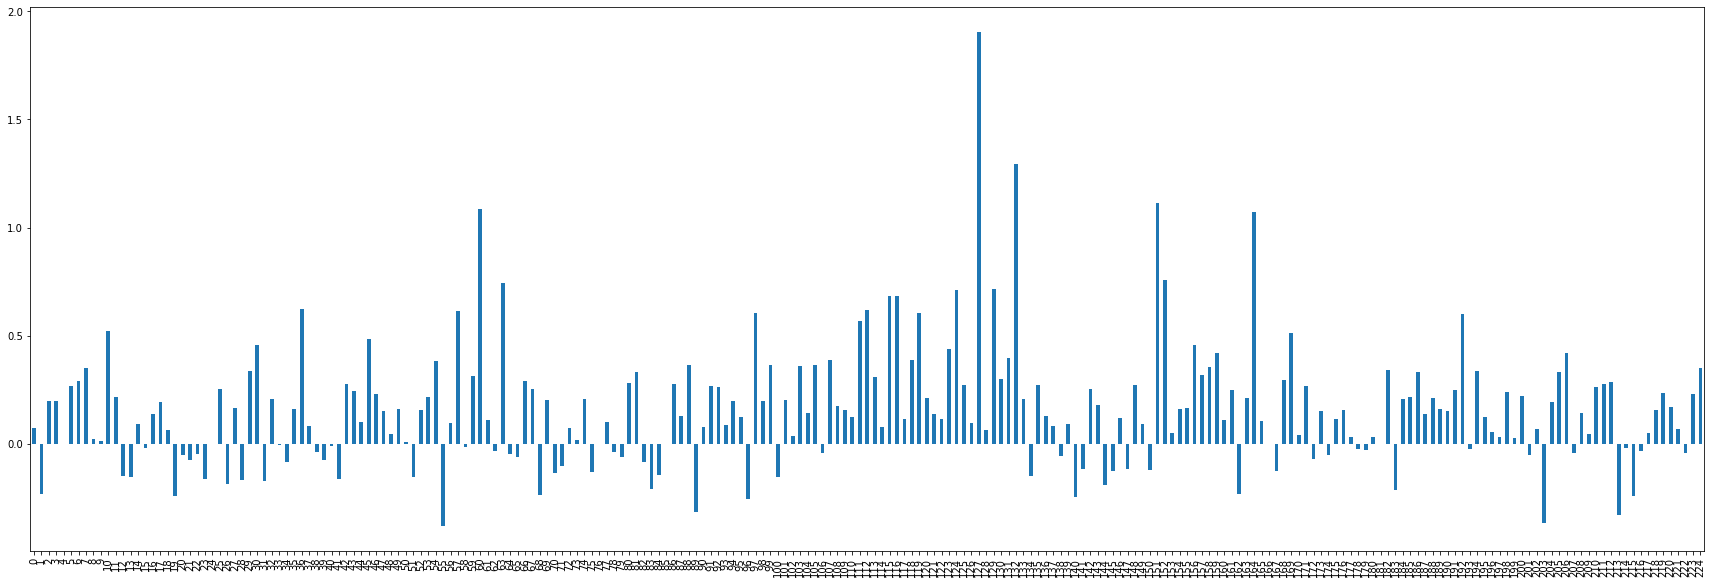

In [17]:
# 各社の騰落率の可視化
# → 2019年はプラスの企業が多い
change_rate['DiffRatio'].plot(kind='bar', figsize=(30, 10))

In [18]:
# 各社の騰落率の可視化（上図は個々の企業が分かりにくいため，plotly で棒グラフを描く）
# → 最も騰落率が高い企業はどこ？
import plotly.express as px
fig = px.bar(change_rate, x='NAME', y='DiffRatio')
fig.show()

In [19]:
# 騰落率のトップ５
# (メモ) 昇順の場合，ascending=True; 降順の場合，ascending=False
change_rate.sort_values('DiffRatio', ascending=False).head(5)

,CODE,NAME,DiffRatio
127,6857,アドバンテスト,1.905821
132,6976,太陽誘電,1.294460
151,7733,オリンパス,1.114608
60,4568,第一三共,1.083928
164,8035,東京エレクトロン,1.070982


In [20]:
# 騰落率のワースト５
# (メモ) 昇順の場合，ascending=True; 降順の場合，ascending=False
change_rate.sort_values('DiffRatio', ascending=True).head(5)

,CODE,NAME,DiffRatio
55,4506,大日本住友製薬,-0.380771
203,9064,ヤマトホールディングス,-0.367828
213,9501,東京電力ホールディングス,-0.330946
89,5707,東邦亜鉛,-0.317270
96,5901,東洋製罐グループホールディングス,-0.255606


# 課題
日経平均銘柄の株価データとして，2020年は1月〜8月末日までのデータを取得済みである。

ご存知のように，新型コロナウイルスの影響により１〜３月の株価は下落傾向にある。
一方，４月以降，業績回復に伴い，株価が上昇した企業もある。

**2020年という特別な年において（８月末までの）騰落率を求め，その結果を分析せよ。**

例えば

- 新型コロナウイルス・ワクチン開発を期待して医薬品業界の株価が上がる
- 巣ごもり消費の結果，運送業界（陸運・開運・空運）の株価が上がる
- 今後も旅行の手控えが予想されるため，鉄道・バス業界の株価が下がる
- GOTOトラベルにより旅行者が増え，鉄道・バス業界の株価が上がる

など，社会情勢をふまえた上で仮説を立て，それが株価の変動，特に騰落率にて説明できるか，検討してください。

Text(0, 0.5, 'Adj Close')

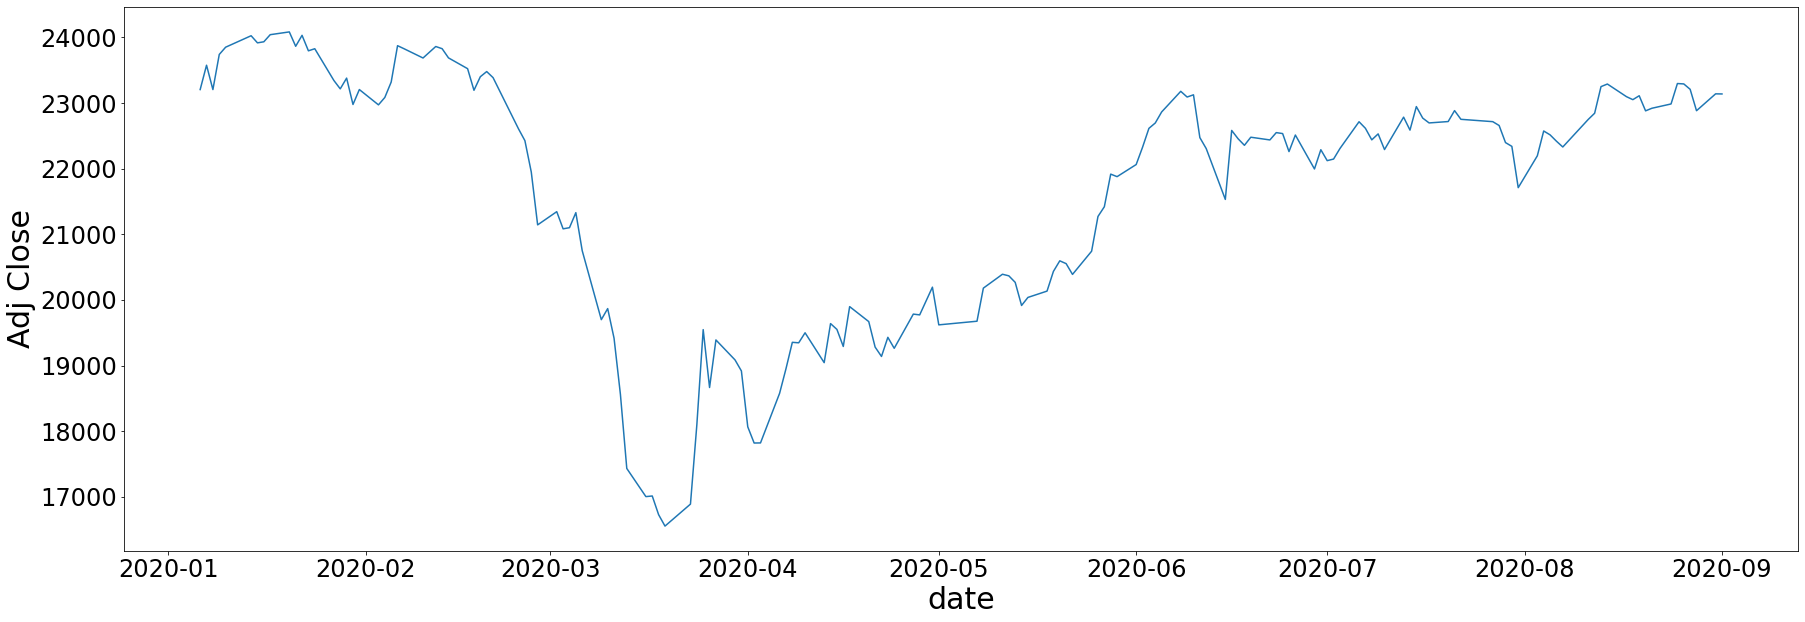

In [21]:
# 日経平均株価の推移 (2020.01.01〜2020.08.31)
from pandas_datareader import data
from datetime import datetime

# データ取得
# '^N225' : ティッカー・シンボル, 'yahoo' : データソースの指定 (Yahoo! finance)
start = datetime(2020, 1, 1)
end = datetime(2020, 8, 31)
df = data.DataReader('^N225', 'yahoo', start, end)

# 日経平均株価：調整済み終値のプロット
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 10))
plt.plot(df.index, df['Adj Close'])
plt.xticks(fontsize=24) # x軸ラベルのフォントサイズを大きめに設定
plt.yticks(fontsize=24) # y軸ラベルのフォントサイズを大きめに設定
plt.xlabel('date', size=30)
plt.ylabel('Adj Close', size=30)